In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
path = "E:\CodeBasics\ML project Real Estate price prediction\Bengaluru_House_Data.csv"

df = pd.read_csv(path)
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [2]:
df.shape

(13320, 9)

In [3]:
df.isnull().sum()
df2 = df.drop(['area_type','society','balcony','availability'],axis = 'columns')
df3 = df2.dropna()
df3.shape

(13246, 5)

In [4]:
# we found that in size column there is values like 2 bhk , 2 bedrooms so we make column name bhk which contain val as 2,3, 4 
# like that
df3['bhk'] = df3['size'].apply(lambda x : int(x.split(' ')[0]))
df3.head()
df3.drop(['size'],axis = 'columns')

C:\Users\sarvesh\anaconda3\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056,2.0,39.07,2
1,Chikka Tirupathi,2600,5.0,120.00,4
2,Uttarahalli,1440,2.0,62.00,3
3,Lingadheeranahalli,1521,3.0,95.00,3
4,Kothanur,1200,2.0,51.00,2
...,...,...,...,...,...
13315,Whitefield,3453,4.0,231.00,5
13316,Richards Town,3600,5.0,400.00,4
13317,Raja Rajeshwari Nagar,1141,2.0,60.00,2
13318,Padmanabhanagar,4689,4.0,488.00,4


In [5]:
df3[df3['bhk']>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [6]:
def isfloat(x):
    try:
        float(x)
    except:
        return False
    return True

In [7]:
df3[~df3['total_sqft'].apply(isfloat)]

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
...,...,...,...,...,...,...
12975,Whitefield,2 BHK,850 - 1060,2.0,38.190,2
12990,Talaghattapura,3 BHK,1804 - 2273,3.0,122.000,3
13059,Harlur,2 BHK,1200 - 1470,2.0,72.760,2
13265,Hoodi,2 BHK,1133 - 1384,2.0,59.135,2


In [8]:
# we found in total_sqft column there are val present in ranges so we convert ranges into vals by taking there average
def conv_sqft_num(num):
    token = num.split('-')
    if(len(token)==2):
        return (float(token[0]) + float(token[1]) //2)
    try:
        return float(num)
    except:
        return None 
        

In [9]:
conv_sqft_num('22-25')

34.0

In [10]:
# we are going to create copy of df3 for safer side ..
df4 = df3.copy()
df4['total_sqft'] = df4['total_sqft'].apply(conv_sqft_num)
df4.head(100)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
...,...,...,...,...,...,...
97,Sarjapura - Attibele Road,3 BHK,1330.0,2.0,48.00,3
98,Devasthanagalu,2 BHK,1200.0,2.0,65.00,2
99,T Dasarahalli,3 Bedroom,1200.0,3.0,90.00,3
100,Yeshwanthpur,3 BHK,2502.0,3.0,138.00,3


In [11]:
# featurre engineering begins nowww.......
df5 = df4.copy()
df5['price per sqft'] = df5['price']*100000 / df5['total_sqft']
df5.head(50)

,location,size,total_sqft,bath,price,bhk,price per sqft
0,Electronic City Phase II,2 BHK,1056.00,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.00,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.00,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.00,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.00,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.00,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.00,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.00,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.00,3.0,63.25,3,4828.244275
9,Gandhi Bazar,6 Bedroom,1020.00,6.0,370.00,6,36274.509804


In [12]:
# remove unnessesary spaces from location column
df5.location  = df5.location.apply(lambda x:x.strip())
# count location as per 
location_stats = df5.groupby('location')['location'].agg('count')
location_stats

location
1 Annasandrapalya                                  1
1 Giri Nagar                                       1
1 Immadihalli                                      1
1 Ramamurthy Nagar                                 1
12th cross srinivas nagar banshankari 3rd stage    1
                                                  ..
t.c palya                                          1
tc.palya                                           4
vinayakanagar                                      1
white field,kadugodi                               1
whitefiled                                         1
Name: location, Length: 1293, dtype: int64

In [13]:
len(location_stats[location_stats<=10])

1052

In [14]:
# check how many locations have less than count 10.
loc_less_10 = location_stats[location_stats<=10]
loc_less_10

location
1 Annasandrapalya                                  1
1 Giri Nagar                                       1
1 Immadihalli                                      1
1 Ramamurthy Nagar                                 1
12th cross srinivas nagar banshankari 3rd stage    1
                                                  ..
t.c palya                                          1
tc.palya                                           4
vinayakanagar                                      1
white field,kadugodi                               1
whitefiled                                         1
Name: location, Length: 1052, dtype: int64

In [15]:
df.location = df.location.apply(lambda x: 'others' if x in location_stats[location_stats<=10] else x)
len(df5.location.unique())

1293

In [16]:
#  location havings count less than 10 put it into other category
df5.location = df5.location.apply(lambda x : 'others' if x in loc_less_10 else x)
len(df5.location.unique())

242

In [17]:
df5.head()

,location,size,total_sqft,bath,price,bhk,price per sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


## OUTLIER REMOVAL  

In [18]:
df6 = df5[df5.total_sqft / df5.bhk >300]


In [19]:
df6['price per sqft'].describe()

count     12274.000000
mean       6193.411794
std        4060.589796
min         267.829813
25%        4171.779141
50%        5250.172771
75%        6818.181818
max      176470.588235
Name: price per sqft, dtype: float64

In [20]:
import numpy as np
def remove_outliers(df):
    df_out = pd.DataFrame()
    for key , subdf in df.groupby('location'):
        m= np.mean(subdf['price per sqft'])
        std = np.std(subdf['price per sqft'])
        reduced_df = subdf[(subdf['price per sqft'] > m-std) &(subdf['price per sqft'] <= m +std)]
        df_out = pd.concat([df_out, reduced_df],ignore_index=True)
    return df_out

In [21]:
df7 = remove_outliers(df6)
df7

,location,size,total_sqft,bath,price,bhk,price per sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.00,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.00,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.00,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.00,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.00,2,11983.805668
...,...,...,...,...,...,...,...
10001,others,2 BHK,1353.0,2.0,110.00,2,8130.081301
10002,others,1 Bedroom,812.0,1.0,26.00,1,3201.970443
10003,others,3 BHK,1440.0,2.0,63.93,3,4439.583333
10004,others,2 BHK,1075.0,2.0,48.00,2,4465.116279


In [22]:
import matplotlib.pyplot as plt
def price_check_plot(df, location):
    bhk2 = df[(df.location == location) & (df.bhk ==2)]
    bhk3 = df[(df.location == location)&(df.bhk==3)]
    plt.figure(figsize = (8,6))
    plt.scatter(bhk2.total_sqft, bhk2['price per sqft'], color='blue')
    plt.scatter(bhk3.total_sqft, bhk3['price per sqft'], color = 'green')
    plt.xlabel("Total Sqft")
    plt.ylabel("Price")
    plt.plot()
    

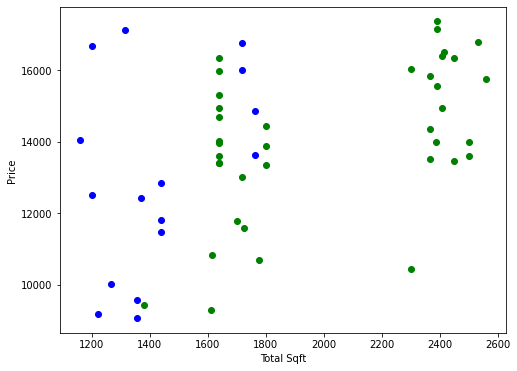

In [23]:
price_check_plot(df7,'Rajaji Nagar')

In [24]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df['price per sqft']),
                'std': np.std(bhk_df['price per sqft']),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df['price per sqft']<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df8 = remove_bhk_outliers(df7)
# df8 = df7.copy()
df8.shape

(7155, 7)

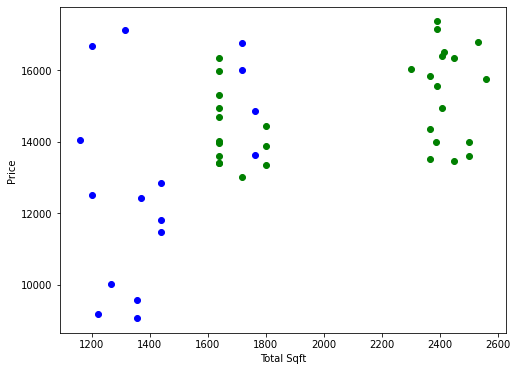

In [25]:
price_check_plot(df8,'Rajaji Nagar')

In [26]:
df8[(df8.bath <= df8.bhk-1) ]

,location,size,total_sqft,bath,price,bhk,price per sqft
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.00,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.00,3,10833.333333
25,2nd Phase Judicial Layout,3 BHK,1450.0,2.0,50.75,3,3500.000000
27,2nd Phase Judicial Layout,3 BHK,1350.0,2.0,47.25,3,3500.000000
28,2nd Phase Judicial Layout,3 BHK,1350.0,2.0,47.25,3,3500.000000
...,...,...,...,...,...,...,...
9954,others,3 Bedroom,1350.0,1.0,120.00,3,8888.888889
9956,others,3 BHK,2292.0,2.0,285.00,3,12434.554974
9963,others,3 BHK,1369.0,2.0,72.00,3,5259.313367
9972,others,4 Bedroom,2700.0,3.0,230.00,4,8518.518519


(array([4.683e+03, 1.729e+03, 6.350e+02, 7.200e+01, 2.600e+01, 5.000e+00,
        0.000e+00, 3.000e+00, 1.000e+00, 1.000e+00]),
 array([ 1. ,  2.5,  4. ,  5.5,  7. ,  8.5, 10. , 11.5, 13. , 14.5, 16. ]),
 <BarContainer object of 10 artists>)

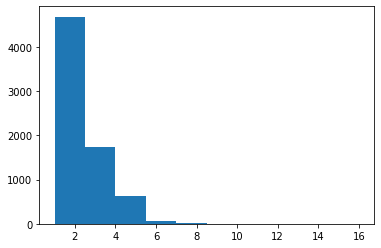

In [27]:
plt.hist(df8.bath)

In [28]:
df9  = df8[df8.bath < df8.bhk +2]
df9.shape

(7083, 7)

In [29]:
df9.drop(['size','price per sqft'],axis=1,inplace=True)

C:\Users\sarvesh\anaconda3\lib\site-packages\pandas\core\frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [30]:
df9

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2
...,...,...,...,...,...
9997,others,1200.0,2.0,70.0,2
9998,others,1800.0,1.0,200.0,1
10001,others,1353.0,2.0,110.0,2
10002,others,812.0,1.0,26.0,1


# Model Building

**One hot encoding**

In [33]:
dummies = pd.get_dummies(df9.location)
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,others
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
df10 = pd.concat([df9, dummies.drop('others', axis=1)], axis=1)
df11  = df10.drop('location', axis=1)

In [39]:
df11.head()

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
x = df11.drop('price', axis=1)
y = df11.price

In [42]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [45]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

lr.score(x_test,y_test)

0.8355108302623849

In [88]:
lr.predict(x_test)

array([ 78.17692131,  26.07124071,  65.26708422, ...,  40.52336161,
       116.0835141 ,  87.49276276])

In [52]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=10,test_size=0.2,random_state=0)
cross_val_score(lr, x,y,cv=cv).mean()

0.8401282483741509

**Hyperparameter Tuning**

In [57]:

from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'positive': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=10,test_size=0.2,random_state=0)
    for model_name, para in algos.items():
        gs = GridSearchCV(estimator= para['model'], param_grid=para['params'], cv=cv, return_train_score= False)
        gs.fit(x,y)
        scores.append({
            'model_name':model_name,
            'best_score':gs.best_score_,
            'best_parameter':gs.best_params_
        })
    return pd.DataFrame(scores, columns= ['model_name','best_score','best_parameter'])

In [58]:
find_best_model_using_gridsearchcv(x,y)

C:\Users\sarvesh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
20 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\sarvesh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sarvesh\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\sarvesh\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 177, in fit
    self._validate_params()
  File "C:\Users\sarvesh\anaconda3\lib\site-packages\sklearn\base.

,model_name,best_score,best_parameter
0,linear_regression,0.840128,{'positive': False}
1,lasso,0.713330,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.678198,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


**Predict The price Now**

In [103]:
x = x.drop(4, axis=1)

In [96]:
x.columns.shape

(245,)

In [116]:
x.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [121]:
def predict_val(location, sqft, bath, bhk):
    loc_index = np.where(x.columns == location)[0][0]
    arr = np.zeros(len(x.columns))
    arr[0] = sqft
    arr[1] = bath
    arr[2] = bhk
    if(loc_index >=0):
        arr[loc_index] =1
    return lr.predict([arr])[0]

In [125]:
loc_index = np.where(x.columns=='Indira Nagar')[0][0]
loc_index

116

In [124]:
predict_val('1st Phase JP Nagar',1000, 2, 2)

C:\Users\sarvesh\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


82.54192990219433

**Export Model to pickel**

In [126]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(lr,f)

In [128]:
import json
columns = {
    'data_columns' : [col.lower() for col in x.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))